In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# zaberリニアアクチュエータ位置と波長の関係

In [2]:
def linearfunc(x, a, b):
    return a*x + b

In [3]:
x = [25.0, 20.07, 15.3]
y = [700, 815, 920]

y=-22.684023401501463x + 1268.144830916213


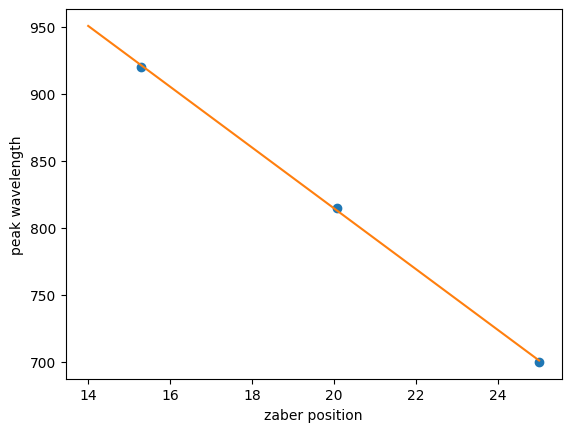

In [4]:
keisuu, _ = curve_fit(linearfunc, x, y)
print(f"y={keisuu[0]}x + {keisuu[1]}")
plt.plot(x,y ,'o')
xlist = np.linspace(14,25, 100)
plt.plot(xlist, linearfunc(xlist, keisuu[0], keisuu[1]))
plt.xlabel('zaber position')
plt.ylabel('peak wavelength')
plt.show()

# ti-spレーザーの波長幅

In [5]:
savedir = "../data/tisp"

In [6]:
def func(x, *params):
    
    #paramsの長さでフィッティングする関数の数を判別。
    num_func = int(len(params)/3)
    
    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加。
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        hwhm = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/(hwhm/np.sqrt(2*np.log(2))))**2)
        y_list.append(y)
        
    #y_listに入っているすべてのガウス関数を重ね合わせる。
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i
    
    #最後にバックグラウンドを追加。
    y_sum = y_sum + params[-1]
    
    return y_sum

In [7]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        hwhm = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/(hwhm/np.sqrt(2*np.log(2))))**2)
        y_list.append(y)
    return y_list

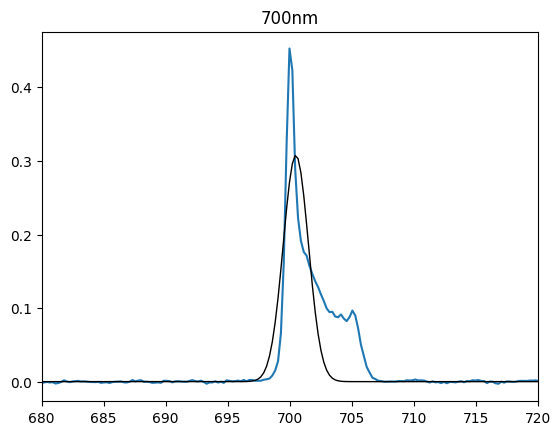

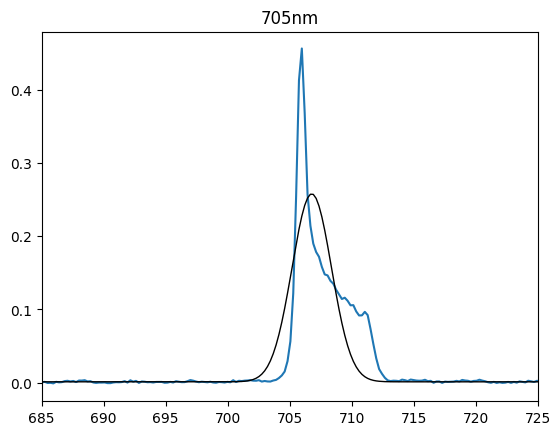

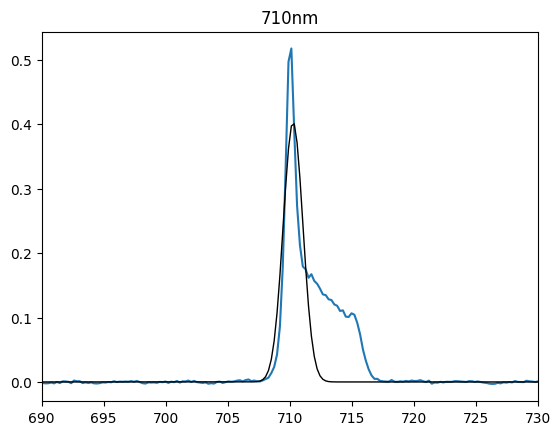

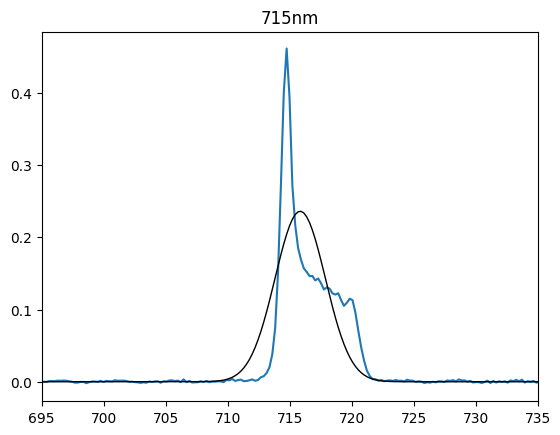

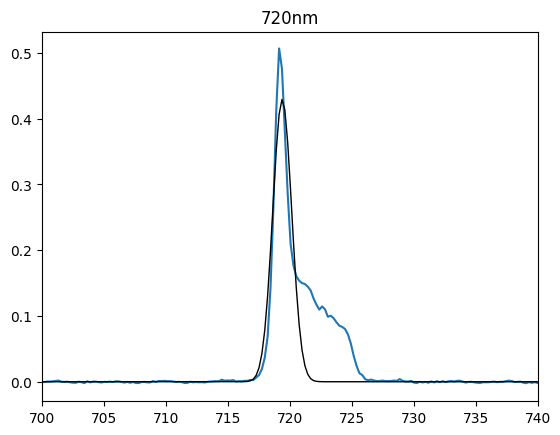

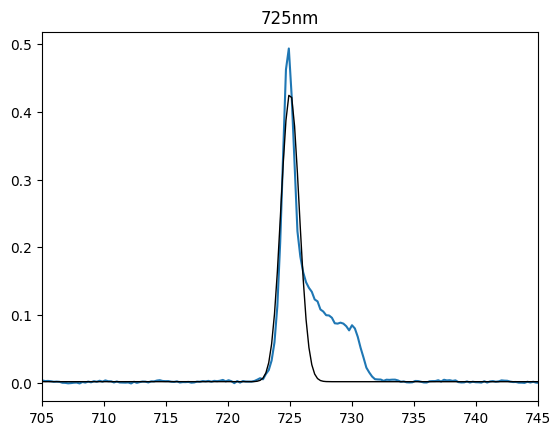

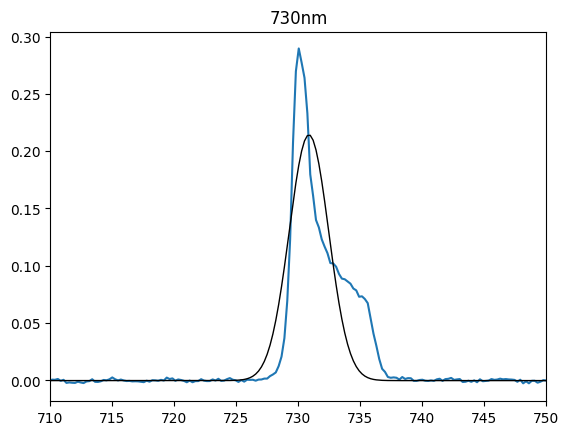

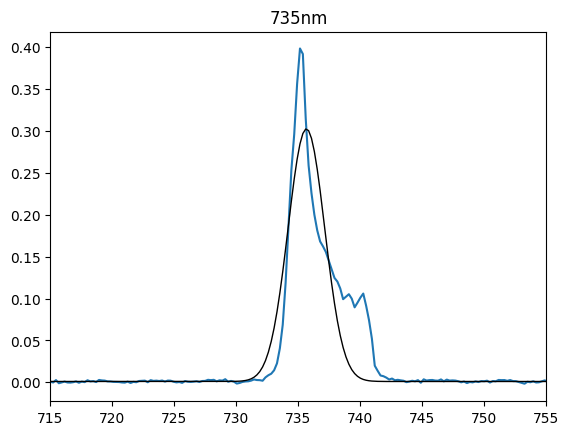

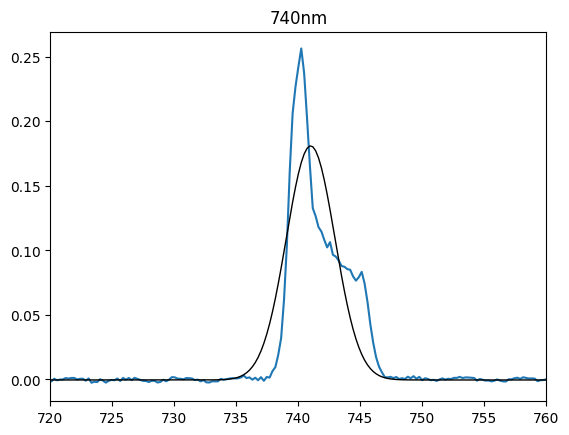

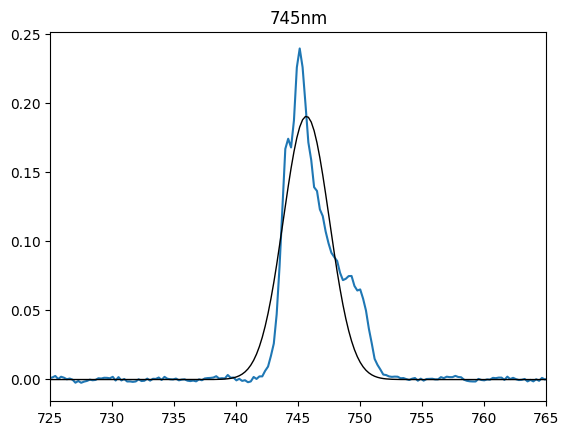

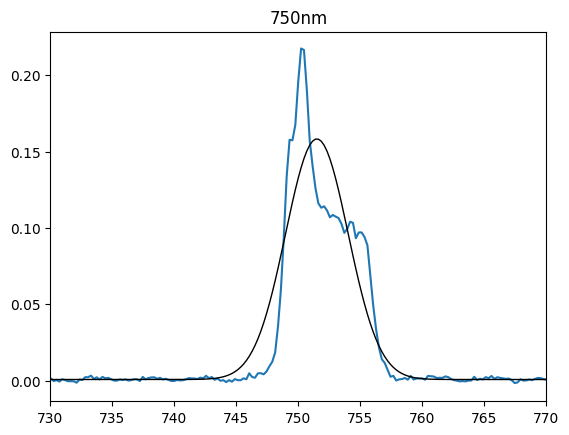

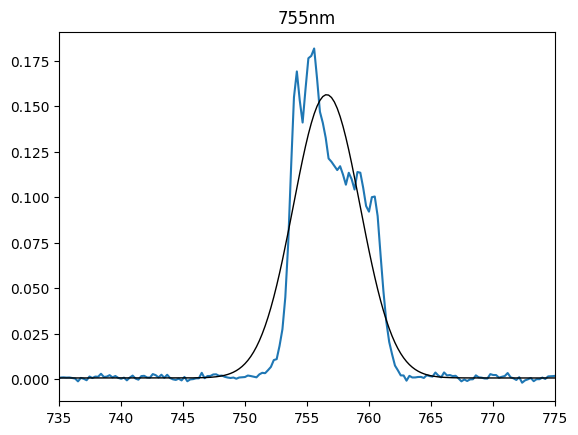

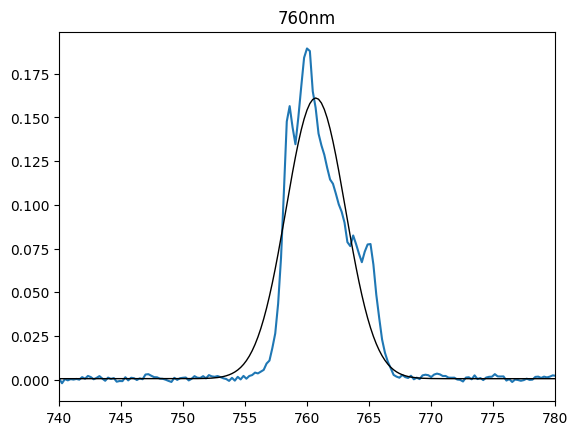

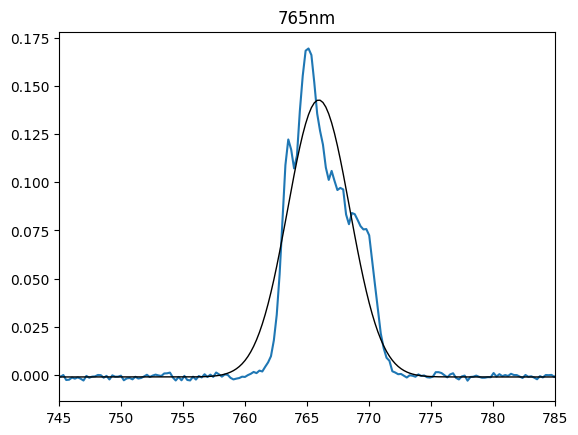

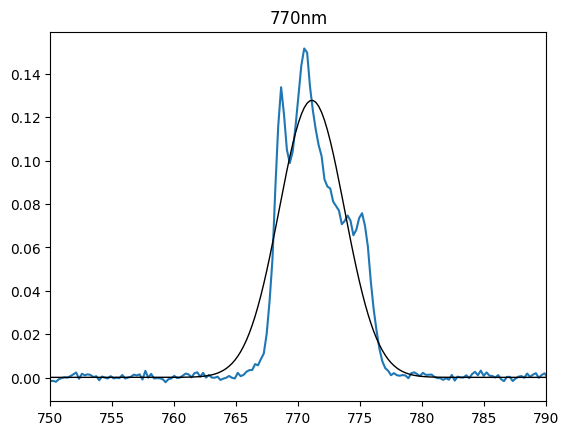

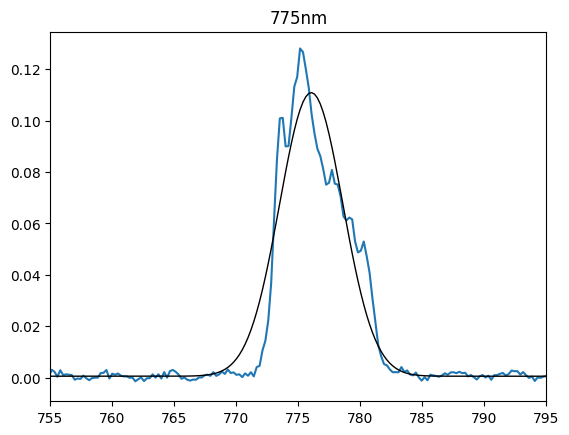

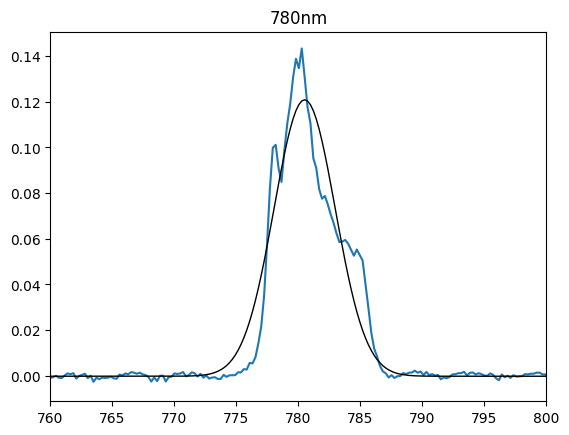

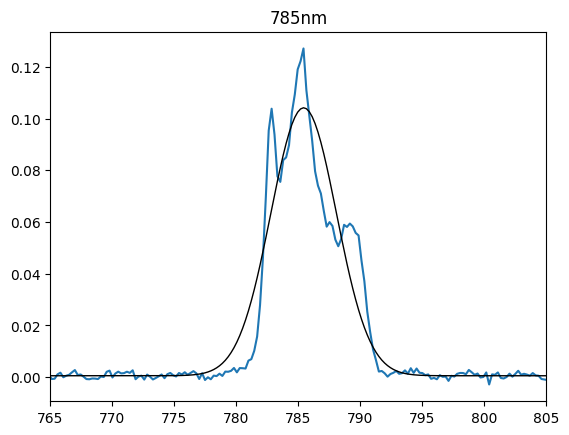

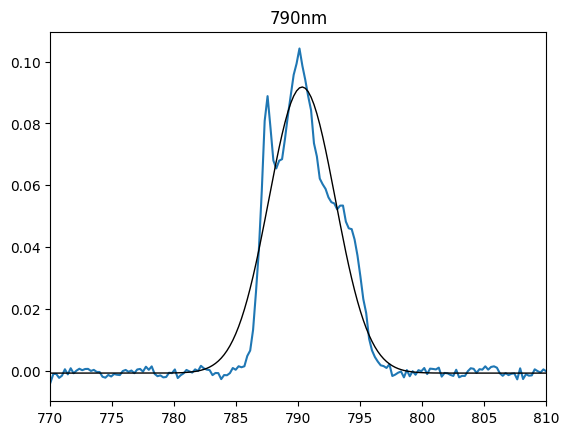

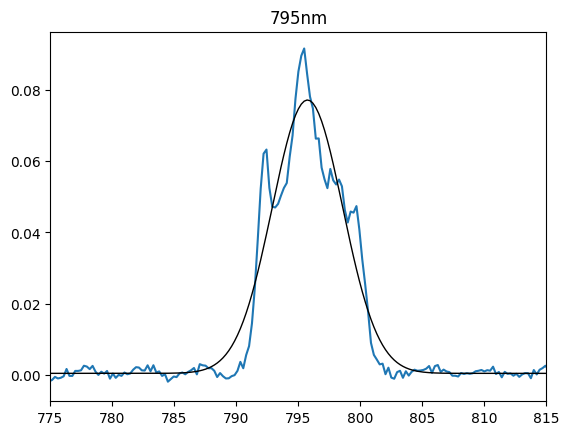

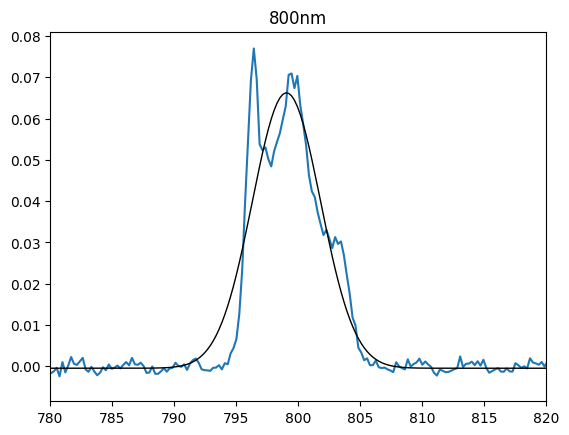

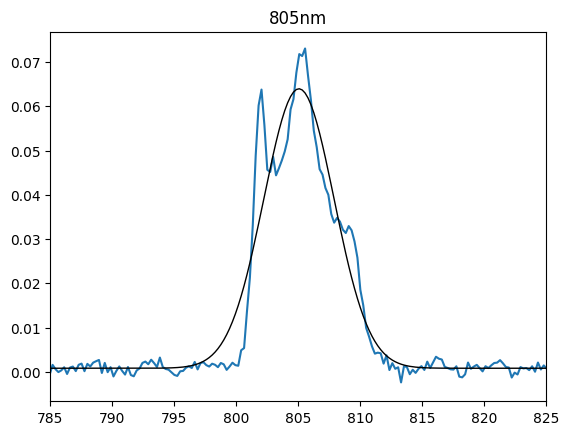

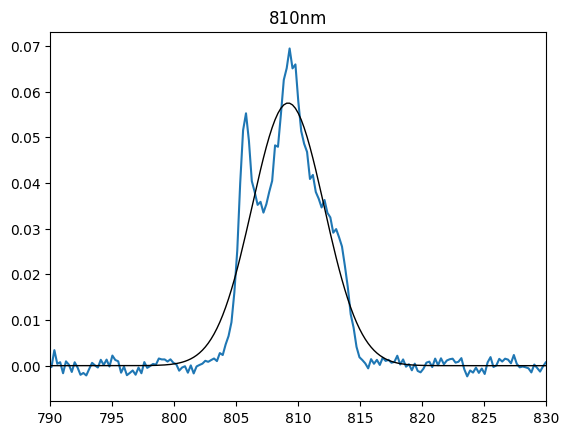

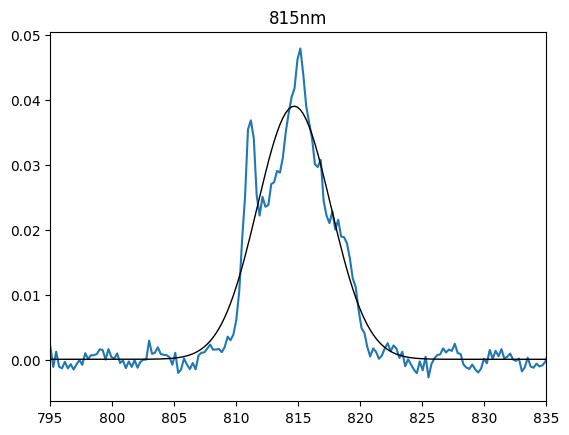

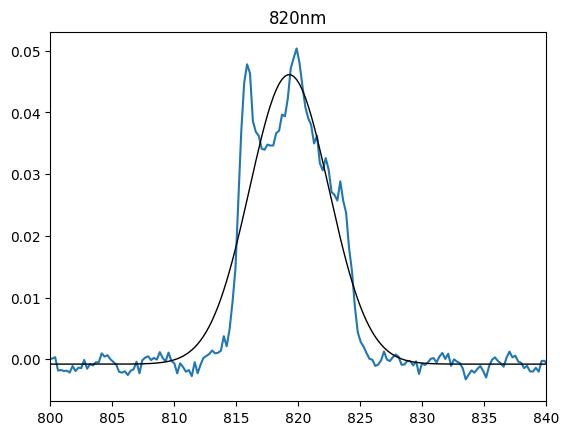

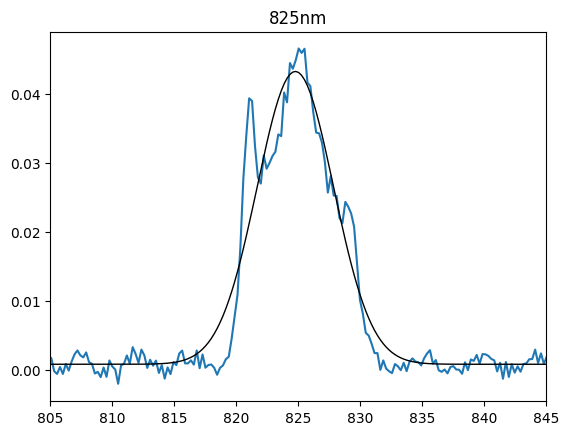

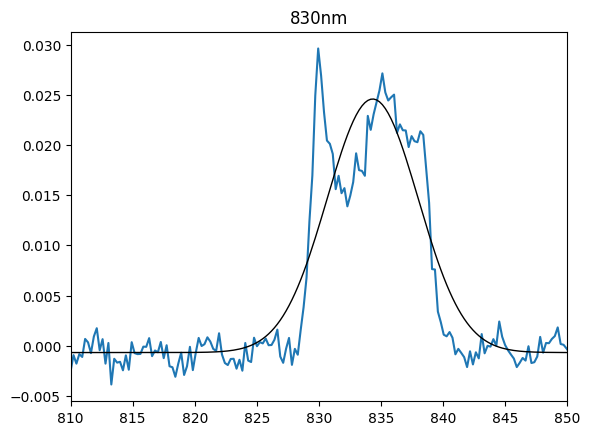

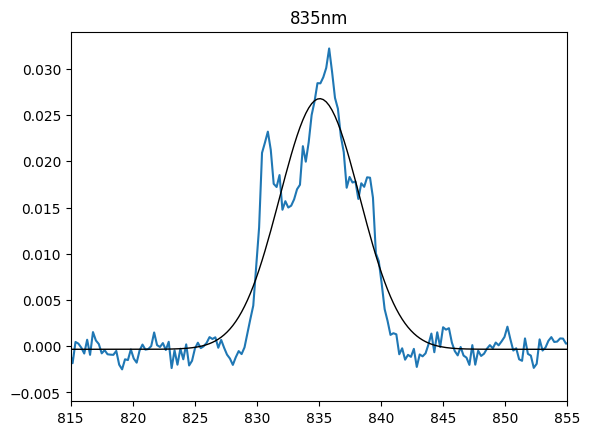

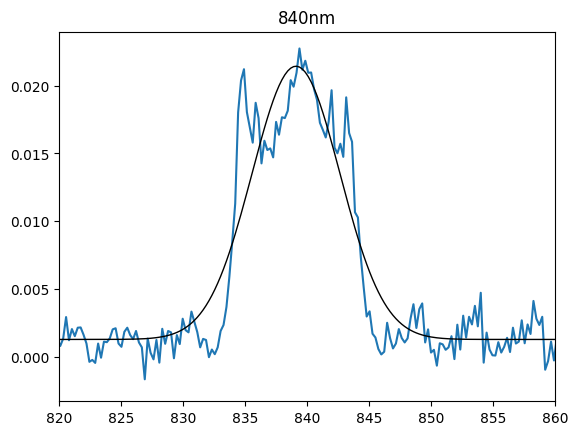

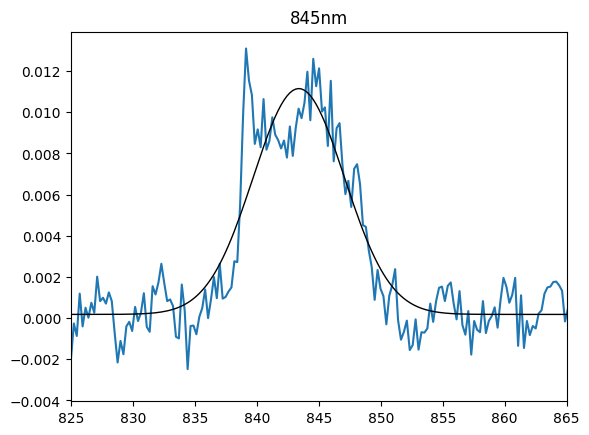

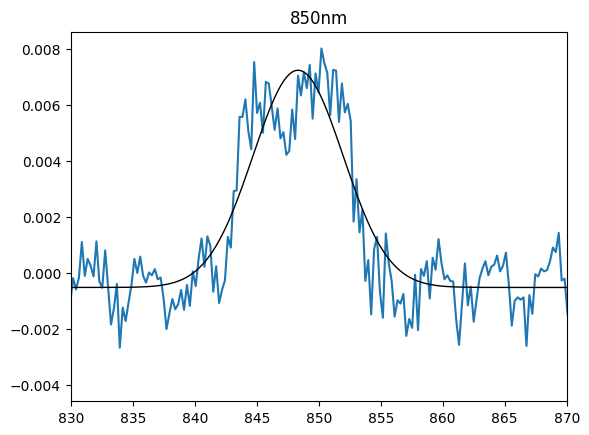

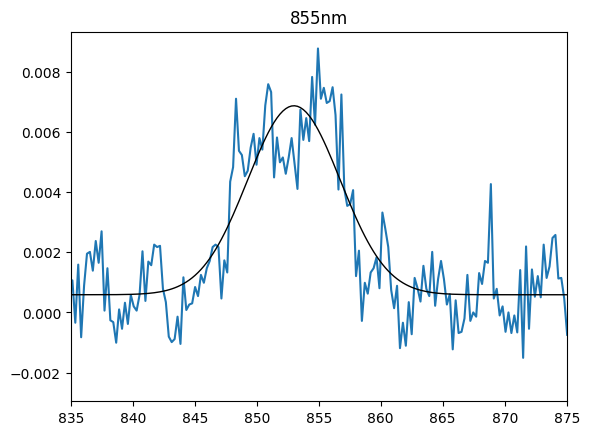

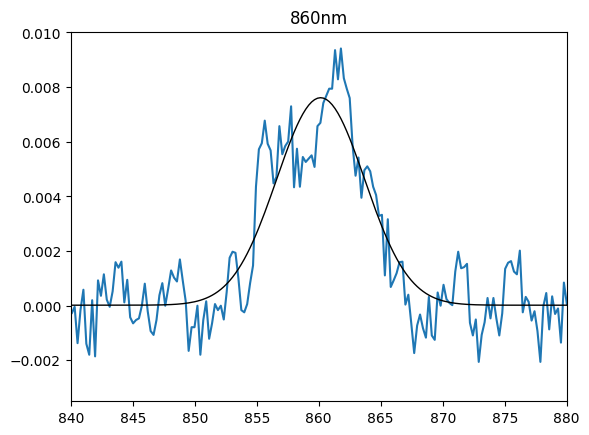

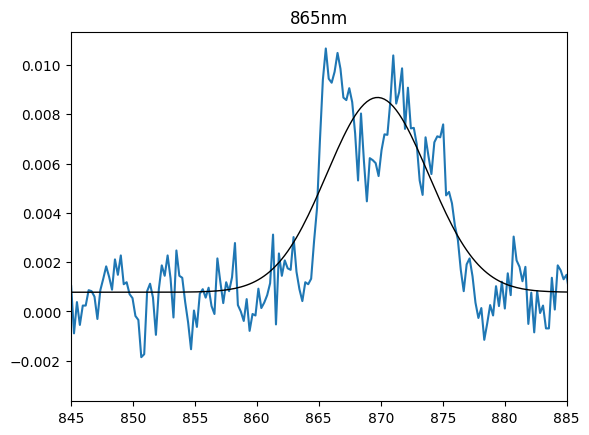

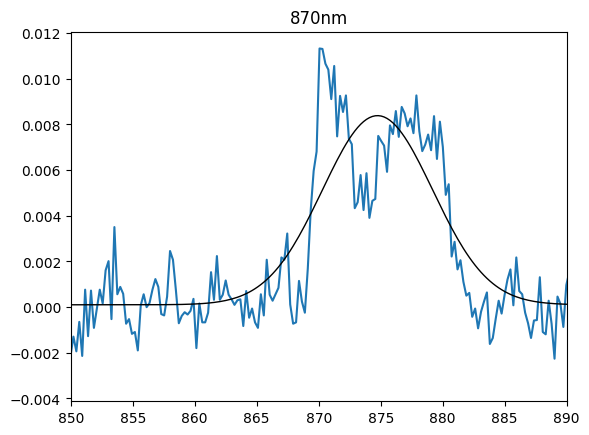

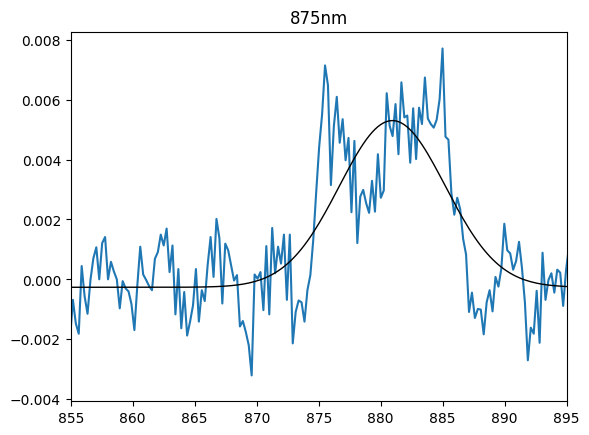

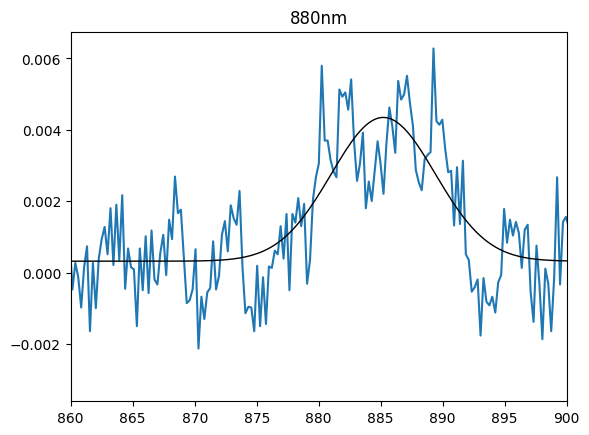

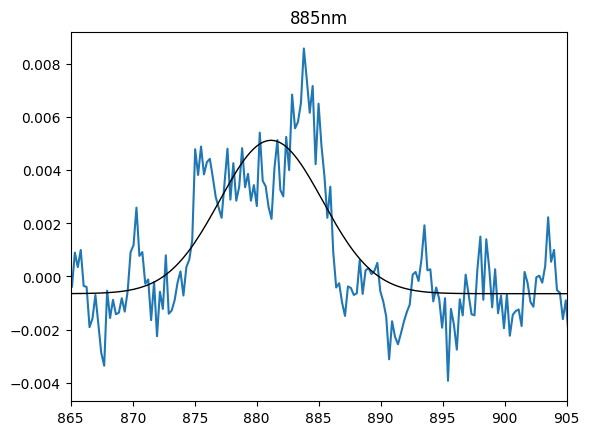

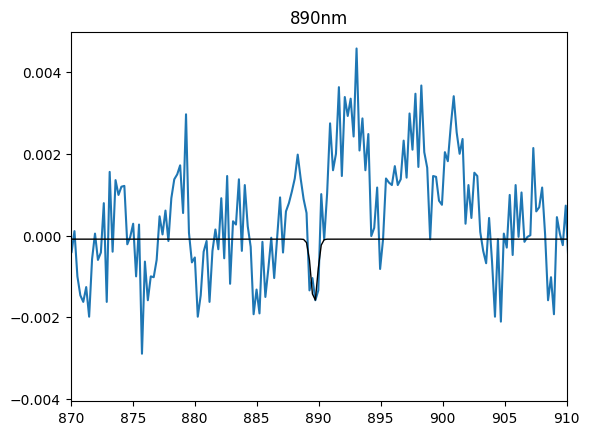

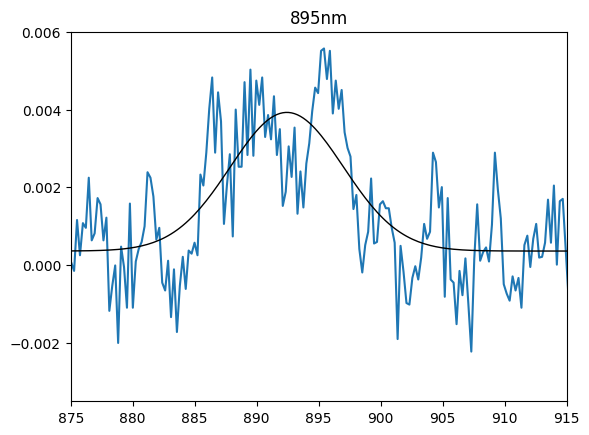

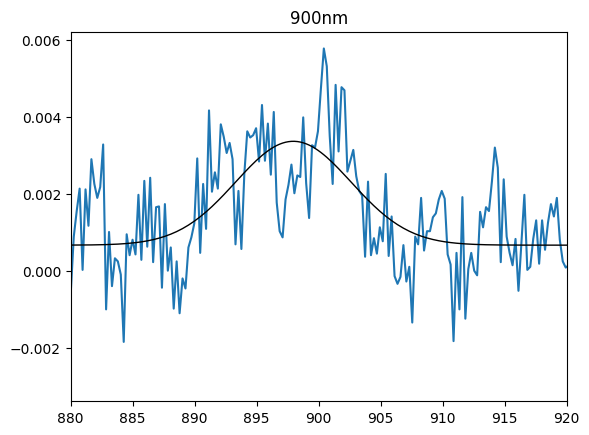

In [8]:
wavelist = []
fitted_peak = []
fitted_hwhm = []
for filename in os.listdir(savedir):
    wave = int(filename.split(".")[0])
    df = pd.read_csv(os.path.join(savedir, filename), header=None, sep="\t")
    x = df.iloc[:,0]
    y = df.iloc[:,1]

    peak_init = []
    peak_init.append([1, wave, 1]) 
    background_init = 0

    guess_total = []
    for i in peak_init:
        guess_total.extend(i)
    guess_total.append(background_init)

    popt, pcov = curve_fit(func, x, y, p0=guess_total)
    
    fit = func(x, *popt)
    plt.title(f"{wave}nm")
    plt.xlim(wave-20, wave+20)
    plt.plot(x, y)
    plt.plot(x, fit , ls='-', c='black', lw=1)
    plt.show()

    fitted_peak.append(popt[1])
    fitted_hwhm.append(popt[2])
    wavelist.append(wave)

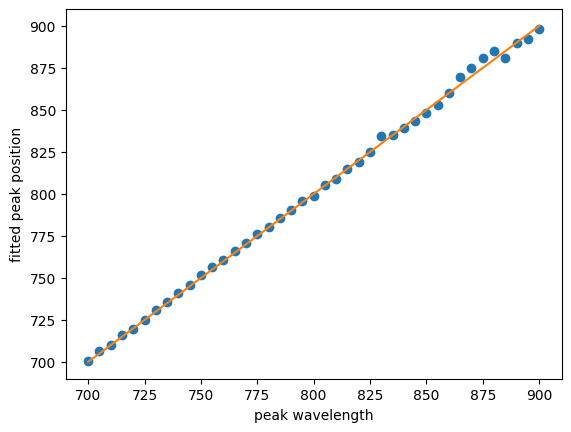

In [9]:
plt.plot(wavelist, fitted_peak, 'o')
plt.plot(wavelist, wavelist)
plt.xlabel('peak wavelength')
plt.ylabel('fitted peak position')
plt.show()

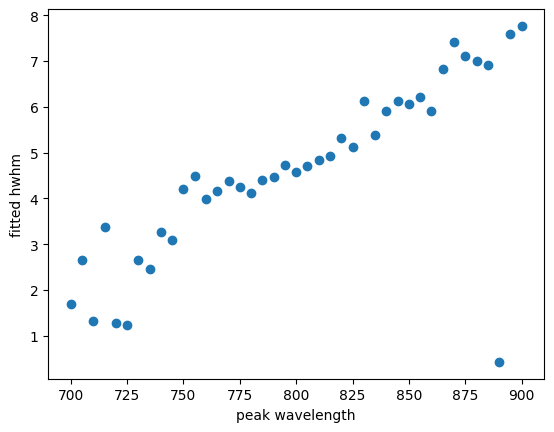

In [10]:
plt.plot(wavelist, fitted_hwhm, 'o')
plt.xlabel('peak wavelength')
plt.ylabel('fitted hwhm')
plt.show()